In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

### (1). Loading Dataset

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the CSV file
#df = pd.read_csv('/content/drive/My Drive/Evaluation-dataset.csv',header=None)

In [3]:
# Read the CSV file
df = pd.read_csv('data/Evaluation-dataset.csv',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### (2). Data Preprocessing

In [5]:
# Assigning custom column names
label_dict = {}
label_list = []
for i in range(15):
    if(i==0):
        label_dict[i] = 'Review'
    else:
        label_dict[i] = 'Label_'+str(i)
        label_list.append('Label_'+str(i))
df.rename(columns = label_dict, inplace=True)

In [6]:
df.head()

,Review,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10,Label_11,Label_12,Label_13,Label_14
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Replacing NaN values with 'no_label'
df = df.fillna('no_label')
df.head()

,Review,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10,Label_11,Label_12,Label_13,Label_14
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label
2,Very easy to use and good value for money.,value for money positive,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label
3,Really easy and convenient to arrange,ease of booking positive,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label,no_label


In [8]:
df.shape

(10132, 15)

In [9]:
# Removing duplicate reviews
df.drop_duplicates(subset=["Review"], keep='first', inplace=True)
df.shape

(10128, 15)

#### Now, we will transform our 14 labels into one target variable name as "Labels". This variable will consist a list of all the labels which occur for a particular review.

In [10]:
df['Labels'] = df[label_list].values.tolist()
df = df.drop(label_list, axis=1)

In [11]:
df.head()

,Review,Labels
0,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi..."
1,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi..."
2,Very easy to use and good value for money.,"[value for money positive, no_label, no_label,..."
3,Really easy and convenient to arrange,"[ease of booking positive, no_label, no_label,..."
4,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ..."


#### Now, we will remove 'no_label' values from list of 'Labels' column and also remove any whitespaces from the lables

In [12]:
def clean_Labels(inp):
    return [elem.strip() for elem in inp if elem != 'no_label']

In [13]:
df['Labels'] = df['Labels'].map(clean_Labels)

In [14]:
df.head(10)

,Review,Labels
0,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi..."
1,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi..."
2,Very easy to use and good value for money.,[value for money positive]
3,Really easy and convenient to arrange,[ease of booking positive]
4,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ..."
5,service was excellent. Only slight downside wa...,"[length of fitting positive, ease of booking p..."
6,User friendly Website. Competitive Prices. Goo...,"[garage service positive, value for money posi..."
7,Excellent prices and service,[value for money positive]
8,It was very straightforward and the garage was...,[garage service positive]
9,Use of local garage.,[location positive]


#### Here, from above we can see that 'no_label' has been removed from the list of 'Labels' column

### (3). Data Visualization

Here we will see how our classes are distributed. We have to find if they are not imbalanced

In [15]:
df['Label_counts'] = df['Labels'].apply(lambda x : len(x))
df['No_of_Reviews'] = 1
df.head(10)

,Review,Labels,Label_counts,No_of_Reviews
0,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi...",2,1
1,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi...",2,1
2,Very easy to use and good value for money.,[value for money positive],1,1
3,Really easy and convenient to arrange,[ease of booking positive],1,1
4,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ...",3,1
5,service was excellent. Only slight downside wa...,"[length of fitting positive, ease of booking p...",3,1
6,User friendly Website. Competitive Prices. Goo...,"[garage service positive, value for money posi...",2,1
7,Excellent prices and service,[value for money positive],1,1
8,It was very straightforward and the garage was...,[garage service positive],1,1
9,Use of local garage.,[location positive],1,1


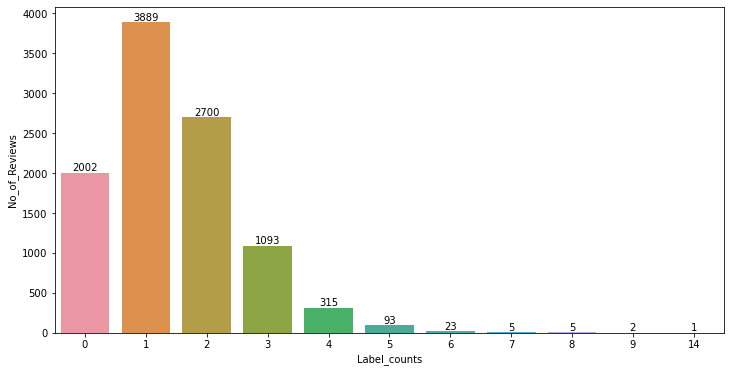

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
groupedvalues = df[['Label_counts','No_of_Reviews']].groupby('Label_counts').sum().reset_index()

# use sns barplot to plot bar plot
# between 'Label_counts' and 'No_of_Reviews' value
ax = sns.barplot(x='Label_counts', y='No_of_Reviews',
                 data=groupedvalues,
                 errwidth=0)

# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])
plt.show()

From above diagram we can see that there are 2002 reviews which does not contain a label. So, we will remove all these reviews. We will also remove reviews whose Label_counts >= 7 because these contain very few datapoints and may be they can be noisy points. In order to avoid overfitting to noisy datapoints, we will remove them

In [17]:
print('Shape of dataframe before removing reviews :',df.shape)
df = df[df['Label_counts'] < 7]
df = df[df['Label_counts'] != 0]
print('Shape of dataframe after removing reviews :',df.shape)

Shape of dataframe before removing reviews : (10128, 4)
Shape of dataframe after removing reviews : (8113, 4)


In [18]:
pd.DataFrame.from_dict(dict(df.Labels.explode().value_counts()),orient = 'index',columns = ['Label_counts'])

,Label_counts
value for money positive,4768
garage service positive,2023
ease of booking positive,1182
location positive,1062
length of fitting positive,656
...,...
only 8 as the garage was unable to fit the tyres in the allotted time and I had to wait over an hour.,1
Great garage fitted them,1
Cheapest price,1
really good prices,1


Here, we can see that few labels does not contain positive or negative sentiment associated with them so we will remove all the labels which does not have sentiment.

In [19]:
# This function will remove labels which does not have positive or negative sentiment associated with them
def replace_without_sentiment(label_list):
    return [elem for elem in label_list if ('positive' in elem or 'negative' in elem)]

df['Labels'] = df['Labels'].map(replace_without_sentiment)

In [20]:
pd.DataFrame.from_dict(dict(df.Labels.explode().value_counts()),orient = 'index',columns = ['Label_counts'])

,Label_counts
value for money positive,4768
garage service positive,2023
ease of booking positive,1182
location positive,1062
length of fitting positive,656
delivery punctuality positive,452
tyre quality positive,432
garage service negative,421
change of date negative,272
wait time positive,271


Here, we can see that we have successfully removed the labels which does not contain positive or negative sentiment associated with them

In [21]:


print("Number of Unique labels after removing noisy labels -",len(df.Labels.explode().unique()))


Number of Unique labels after removing noisy labels - 55


### Now, we have to check distribution of token lengths in Reviews :

In [22]:
def calculate_token_length(sentence):
    return len(sentence.split(' '))
df['token_length'] = df['Review'].map(calculate_token_length)
df.head()

,Review,Labels,Label_counts,No_of_Reviews,token_length
0,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi...",2,1,36
1,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi...",2,1,10
2,Very easy to use and good value for money.,[value for money positive],1,1,9
3,Really easy and convenient to arrange,[ease of booking positive],1,1,6
4,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ...",3,1,16


<Figure size 1296x576 with 0 Axes>

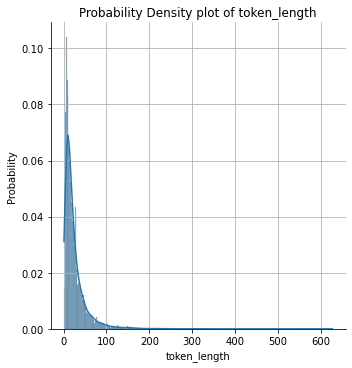

In [23]:
plt.figure(figsize=(18,8))
sns.displot(df, x="token_length", stat="probability", kde=True)
plt.grid()
plt.title("Probability Density plot of token_length")
plt.show()

<Figure size 1296x576 with 0 Axes>

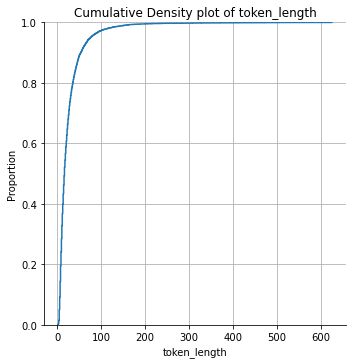

In [24]:
plt.figure(figsize=(18,8))
sns.displot(df, x="token_length", stat="proportion", kind='ecdf')
plt.grid()
plt.title("Cumulative Density plot of token_length")
plt.show()

From above PDf and CDF plots of token_length, we can see that it is good to take token_length = 150 because it will cover almost 99% of datapoints.

In [25]:
unique_labels = list(df.Labels.explode().unique())


### (4). USing Bart LLM for Inference

In [27]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

In [28]:
sequence_to_classify = "One tyre went missing, so there was a delay to get the two tyres fitted. The way garage dealt \
with it was fantastic."
candidate_labels = unique_labels
classifier(sequence_to_classify, candidate_labels, multi_label=True)

{'sequence': 'One tyre went missing, so there was a delay to get the two tyres fitted. The way garage dealt with it was fantastic.',
 'labels': ['garage service positive',
  'facilities positive',
  'response time positive',
  'balancing positive',
  'advisor/agent service positive',
  'value for money positive',
  'refund timescale positive',
  'advisoragent service positive',
  'delivery punctuality positive',
  'mobile fitter positive',
  'balancing negative',
  'ease of booking positive',
  'wait time negative',
  'location positive',
  'discounts positive',
  'change of time negative',
  'wait time positive',
  'refund positive',
  'length of fitting negative',
  'change of date positive',
  'length of fitting positive',
  'booking confusion positive',
  'response time negative',
  'extra charges positive',
  'call wait time negative',
  'tyre quality positive',
  'mobile fitter negative',
  'change of date negative',
  'delivery punctuality negative',
  'late notice negative',
  

Conclusion : From above we can see that it is giving partial correct answer and it is more biased towards positive sentiment

### (5). Finetuning 'Bert-base-uncased' model on our dataset

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

# Creating a new dataframe
new_df = pd.DataFrame(columns=['text', 'label'])
new_df['text'] = df['Review']
new_df['label'] = df['Labels']


# Load your dataset and split it
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
new_df['label'] = mlb.fit_transform(new_df['label'])

# Split the dataset
train_df, val_df = train_test_split(new_df, test_size=0.2, random_state=42)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [27]:
#Create a PyTorch Dataset and DataLoader

import torch
from torch.utils.data import Dataset, DataLoader


class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

def custom_collate_fn(batch):
    input_ids = torch.stack([item['input_ids'] for item in batch])
    attention_mask = torch.stack([item['attention_mask'] for item in batch])
    labels = torch.stack([item['label'].unsqueeze(0) for item in batch]).squeeze(1)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels
    }

def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = SentimentDataset(
        texts=df.text.to_numpy(),
        labels=df.label.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=4,
        collate_fn=custom_collate_fn
    )





BATCH_SIZE = 16
MAX_LEN = 150

train_data_loader = create_data_loader(train_df, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(val_df, tokenizer, MAX_LEN, BATCH_SIZE)


In [28]:
# Fine-tune BERT

from transformers import BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(mlb.classes_))
model = model.to(device)

# Training loop
EPOCHS = 10

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = torch.nn.CrossEntropyLoss().to(device)

def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs.logits, dim=1)
        loss = loss_fn(outputs.logits, labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)


# This function is used to evaluate the model performance
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs.logits, dim=1)
            loss = loss_fn(outputs.logits, labels)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)



history = {
    'train_acc': [],
    'train_loss': [],
    'val_acc': [],
    'val_loss': [],
    'train_f1': [],
    'val_f1': [],
    'train_precision': [],
    'val_precision': [],
    'train_recall': [],
    'val_recall': []
}

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(train_df)
    )

    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(val_df)
    )

    train_preds = []
    train_labels = []

    val_preds = []
    val_labels = []

    # Collect training metrics
    model.eval()
    with torch.no_grad():
        for d in train_data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)


            train_preds.append(preds)
            train_labels.append(labels)

    train_labels = torch.cat(train_labels, dim=0).cpu()
    train_preds = torch.cat(train_preds, dim=0).cpu()

    train_f1 = f1_score(train_labels, train_preds, average='weighted')
    train_precision = precision_score(train_labels, train_preds, average='weighted')
    train_recall = recall_score(train_labels, train_preds, average='weighted')

    # Collect validation metrics
    with torch.no_grad():
        for d in val_data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)
            val_preds.append(preds)
            val_labels.append(labels)

    val_labels = torch.cat(val_labels, dim=0).cpu()
    val_preds = torch.cat(val_preds, dim=0).cpu()

    val_f1 = f1_score(val_labels, val_preds, average='weighted')
    val_precision = precision_score(val_labels, val_preds, average='weighted')
    val_recall = recall_score(val_labels, val_preds, average='weighted')

    history['train_acc'].append(train_acc.item())
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc.item())
    history['val_loss'].append(val_loss)
    history['train_f1'].append(train_f1)
    history['val_f1'].append(val_f1)
    history['train_precision'].append(train_precision)
    history['val_precision'].append(val_precision)
    history['train_recall'].append(train_recall)
    history['val_recall'].append(val_recall)

    print(f'Train loss {train_loss} accuracy {train_acc}')
    print(f'Validation loss {val_loss} accuracy {val_acc}')
    print()

# Save the model
model.save_pretrained('sentiment_model')
tokenizer.save_pretrained('sentiment_tokenizer')


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
----------
Train loss 0.09334013338391141 accuracy 0.9898305084745763
Validation loss 0.026192670153892216 accuracy 0.9956869993838571

Epoch 2/10
----------
Train loss 0.03262386077142142 accuracy 0.9938366718027735
Validation loss 0.022378485071171513 accuracy 0.9956869993838571

Epoch 3/10
----------
Train loss 0.02408523136650079 accuracy 0.9938366718027735
Validation loss 0.024408606408328256 accuracy 0.9944547134935305

Epoch 4/10
----------
Train loss 0.012272305978006761 accuracy 0.9959938366718027
Validation loss 0.03410159281338565 accuracy 0.9950708564386938

Epoch 5/10
----------
Train loss 0.007397184166782008 accuracy 0.99768875192604
Validation loss 0.037750929538970905 accuracy 0.9950708564386938

Epoch 6/10
----------
Train loss 0.004845062871116645 accuracy 0.9989214175654854
Validation loss 0.038309747617698606 accuracy 0.9944547134935305

Epoch 7/10
----------
Train loss 0.002799637230019099 accuracy 0.9993836671802774
Validation loss 0.03877896219708811 

('sentiment_tokenizer/tokenizer_config.json',
 'sentiment_tokenizer/special_tokens_map.json',
 'sentiment_tokenizer/vocab.txt',
 'sentiment_tokenizer/added_tokens.json')

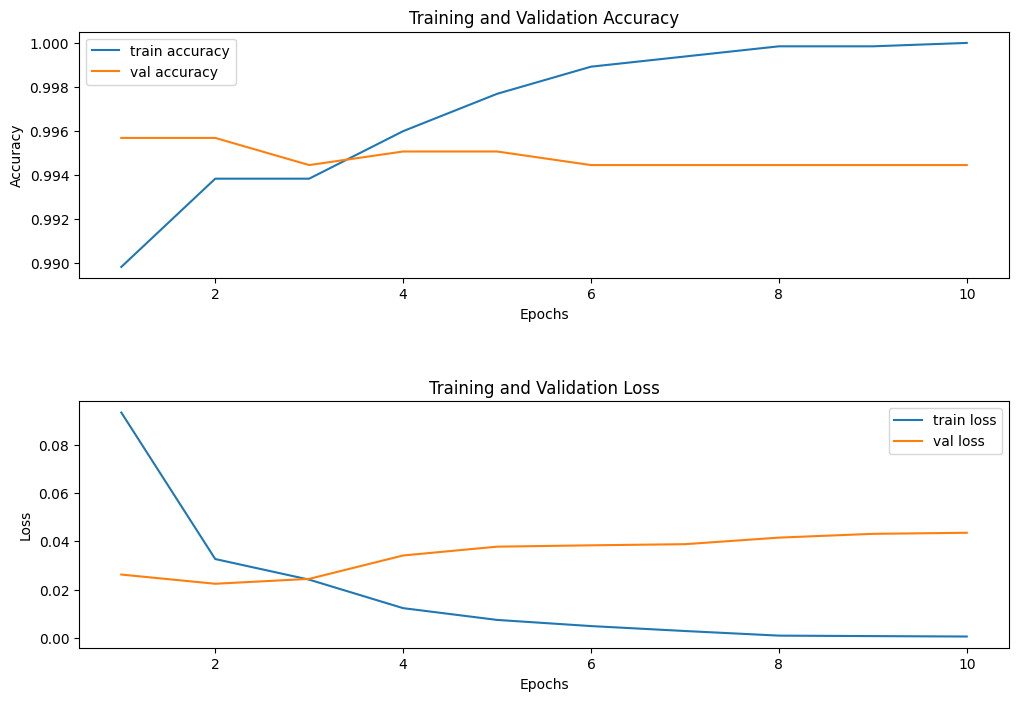

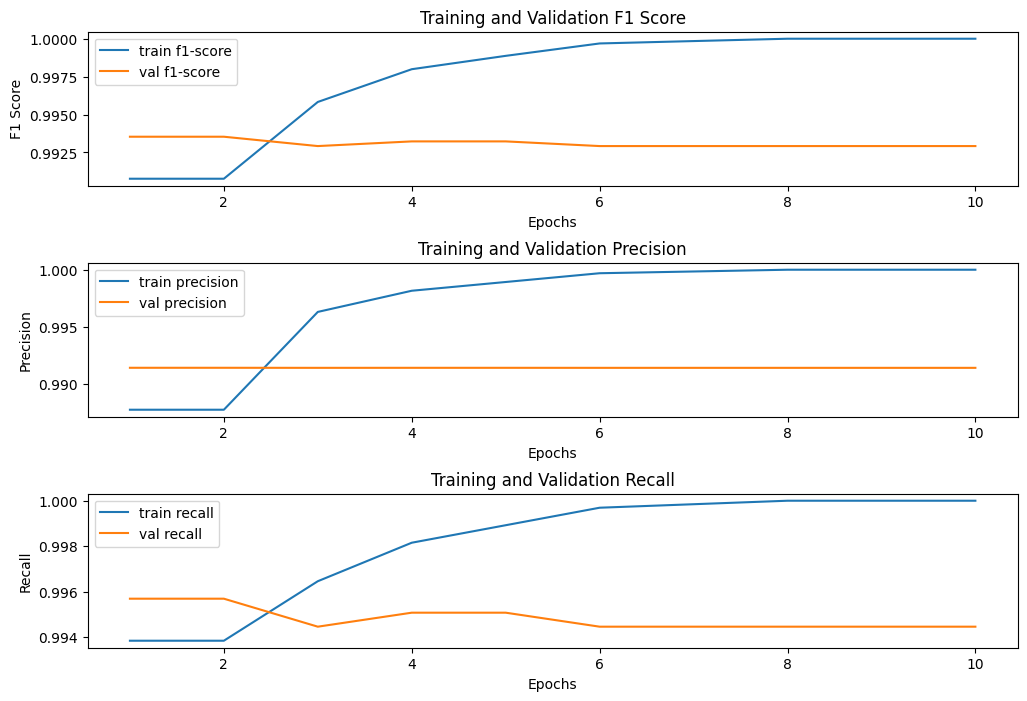

In [29]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(range(1, EPOCHS + 1), history['train_acc'], label='train accuracy')
plt.plot(range(1, EPOCHS + 1), history['val_acc'], label='val accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(1, EPOCHS + 1), history['train_loss'], label='train loss')
plt.plot(range(1, EPOCHS + 1), history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()

# Plot training & validation F1, Precision, Recall
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(range(1, EPOCHS + 1), history['train_f1'], label='train f1-score')
plt.plot(range(1, EPOCHS + 1), history['val_f1'], label='val f1-score')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Training and Validation F1 Score')

plt.subplot(3, 1, 2)
plt.plot(range(1, EPOCHS + 1), history['train_precision'], label='train precision')
plt.plot(range(1, EPOCHS + 1), history['val_precision'], label='val precision')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')

plt.subplot(3, 1, 3)
plt.plot(range(1, EPOCHS + 1), history['train_recall'], label='train recall')
plt.plot(range(1, EPOCHS + 1), history['val_recall'], label='val recall')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Training and Validation Recall')

# Add spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


# **INFERENCE**

In [57]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('/content/sentiment_tokenizer')

# Load model
model = BertForSequenceClassification.from_pretrained('/content/sentiment_model')

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Example text for inference
text = "One tyre went missing, so there was a delay to get the two tyres fitted. The way garage dealt \
with it was fantastic."

# Tokenize the input text
inputs = tokenizer(text, return_tensors='pt', max_length=150, truncation=True, padding='max_length')

# Move input tensors to the same device as the model
inputs = {key: value.to(device) for key, value in inputs.items()}

# Perform inference
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Apply softmax to get probabilities
probs = torch.nn.functional.sigmoid(logits)

# Tensor to numpy array
prob_arr = probs.numpy()

label_list = []

for arr in prob_arr:
    temp_list= []
    for elem in arr:
        if elem >=0.3:
            temp_list.append(1)
        else:
            temp_list.append(0)
    label_list.append(temp_list[::-1])

predicted_label = mlb.inverse_transform(np.array(label_list))

print(f'Text : {text}')
print(f'Predicted class label : {predicted_label}')


Text : One tyre went missing, so there was a delay to get the two tyres fitted. The way garage dealt with it was fantastic.
Predicted class label : [('refund positive', 'wait time negative', 'wait time positive')]
